In [57]:
# 정상 이파리와 질병 이파리 분류 모델 만들기
## 데이터 출처: https://cafe.daum.net/oracleoracle/SpOP/283

## 전체적인 작업 과정
# 1. 원본 이미지를 작은 사이즈로 resize 한다.
# 2. 사진을 숫자 행렬로 변환
# 3. 레이블 csv 파일을 생성
# 4. 레이블 csv 파일을 원 핫 인코딩
# 5. 신경망 구현 및 학습
# 6. 모델 성능 개선
# 7. 신경망 활용 사용자 인터페이스 생성

In [19]:
## train 데이터 원본 이미지 32x32로 리사이징 하기
# 필요한 모듈 불러오기
import cv2
import os

# 원본 이미지가 있는 디렉토리 지정
input_path = '/Users/dgriii0606/data/leaf/train4000'
output_path = '/Users/dgriii0606/data/leaf/resize/train'

# 저장 디렉토리가 존재하지 않으면 생성
os.makedirs(output_path, exist_ok=True)

# 입력 디렉토리의 파일 리스트 가져오기
file_list = os.listdir(input_path)
# print(file_list)

# 이미지 파일만 처리하도록 필터링
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')  # 지원하는 이미지 형식
file_list = [file for file in file_list if file.lower().endswith(valid_extensions)]

# 파일들을 하나씩 리사이즈하고 저장
for k in file_list:
    img_path = os.path.join(input_path, k)
    img = cv2.imread(img_path)  # 이미지를 읽음
    
    if img is None:  # 이미지가 제대로 읽히지 않을 경우
        print(f"이미지를 불러오지 못했습니다: {k}")
        continue

    # 이미지 리사이즈
    resize_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)

    # 리사이즈된 이미지 저장
    output_img_path = os.path.join(output_path, k)
    cv2.imwrite(output_img_path, resize_img)

print("이미지 리사이즈 완료!")

이미지 리사이즈 완료!


In [13]:
## test 데이터 원본 이미지 32x32로 리사이징 하기
# 원본 이미지가 있는 디렉토리 지정
input_path = '/Users/dgriii0606/data/leaf/test100'
output_path = '/Users/dgriii0606/data/leaf/resize/test'

# 저장 디렉토리가 존재하지 않으면 생성
os.makedirs(output_path, exist_ok=True)

# 입력 디렉토리의 파일 리스트 가져오기
file_list = os.listdir(input_path)
# print(file_list)

# 이미지 파일만 처리하도록 필터링
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')  # 지원하는 이미지 형식
file_list = [file for file in file_list if file.lower().endswith(valid_extensions)]

# 파일들을 하나씩 리사이즈하고 저장
for k in file_list:
    img_path = os.path.join(input_path, k)
    img = cv2.imread(img_path)  # 이미지를 읽음
    
    if img is None:  # 이미지가 제대로 읽히지 않을 경우
        print(f"이미지를 불러오지 못했습니다: {k}")
        continue

    # 이미지 리사이즈
    resize_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)

    # 리사이즈된 이미지 저장
    output_img_path = os.path.join(output_path, k)
    cv2.imwrite(output_img_path, resize_img)

print("이미지 리사이즈 완료!")

이미지 리사이즈 완료!


In [39]:
## 이미지를 숫자 행렬로 변환
# 필요한 모듈 불러오기
import os
import re
import cv2
import numpy as np

# 이미지 불러와서 숫자로 변환하는 함수
def image_load(path):
    # 사진 파일명에서 숫자부분만 가져오기
    file_list  = os.listdir(path)  # path 디렉토리에 파일명들을 불러옴
    file_name = []
    for i in file_list:
        a = int( re.sub('[^0-9]', '',  i ) )  # i 가 숫자가 아니라면 null 로 변경해라 
        file_name.append(a)
    file_name.sort()
 
    # 디렉토리와 숫자 파일명 이어 붙이기
    file_res = [ ]
    for j in file_name:    
        file_res.append( path + '/' + str(j) + '.jpg' )  # 전체 경로 + 파일명을 생성

    # 위에서만든 디렉토리와 파일명을 가지고 사진을 숫자로 변경
    image = [ ] 
    for k in file_res:
        img = cv2.imread(k)  # 이미지를 숫자로 변경함
        image.append(img)

    return np.array(image)

In [41]:
# train 리사이즈드 이미지 경로
train_images='/Users/dgriii0606/data/leaf/resize/train' 
# test 리사이즈드 이미지 경로
test_images ='/Users/dgriii0606/data/leaf/resize/test'

image_load(train_images)
image_load(test_images)

array([[[[  0,   2,   0],
         [  0,   1,   0],
         [  0,   0,   0],
         ...,
         [  0,   1,   0],
         [  2,   1,   0],
         [  4,   1,   0]],

        [[  0,   1,   0],
         [  0,   1,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  2,   1,   0],
         [  2,   1,   0]],

        [[  0,   0,   0],
         [  0,   1,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   1,   0]],

        ...,

        [[  2,   0,   1],
         [  1,   1,   1],
         [  0,   1,   0],
         ...,
         [  0,   2,   0],
         [  2,   3,   1],
         [  0,   0,   0]],

        [[  0,   0,   3],
         [  1,   0,   2],
         [  1,   2,   0],
         ...,
         [  0,   0,   0],
         [  0,   2,   3],
         [  0,   1,   2]],

        [[  0,   0,   3],
         [  0,   1,   2],
         [  0,   1,   0],
         ...,
         [  0,   0,   1],
        

In [49]:
## 파일 순번에 따라 레이블 csv 파일 생성하기
# train 데이터 : 정상: 1 ~ 2000번, 질병: 17001 ~ 19000번
# test 데이터 :  정상: 1 ~ 50번, 질병: 951 ~ 1000번
# 정상: 0, 질병: 1로 csv 파일을 구성함 (train -> 0: 2000개, 1: 2000개, test -> 0: 100개, 1: 100개)

path = '/Users/dgriii0606/data/leaf/train_label.csv'
file = open( path, 'w' )  # 비어있는 파일 생성

# 숫자 0을 2000개, 숫자 1을 2000개 작성
for i in range(1, 2001):
    file.write( str(0) + '\n')
for i in range(2001, 4001):
    file.write( str(1) + '\n')

file.close()  # 저장

# 테스트 데이터도 생성
path = '/Users/dgriii0606/data/leaf/test_label.csv'
file = open( path, 'w' )  # 비어있는 파일 생성

# 숫자 0을 50개, 숫자 1을 50개 작성
for i in range(1, 51):
    file.write( str(0) + '\n')
for i in range(51, 101):
    file.write( str(1) + '\n')

file.close()  # 저장

In [55]:
## 레이블 csv 파일 불러와서 원-핫-인코딩 실시

# 모듈 불러오기
from tensorflow.keras.utils import to_categorical
import csv
import numpy as np 

# 라벨 csv 파일 로드해서 원-핫-인코딩 하는 함수 생성
def label_load(path):
    file = open(path)
    label_data = csv.reader(file)
    label_list = [ ]
    for i in label_data:
        label_list.append(i)
 
    label = np.array(label_list)   # 넘파이 배열로 변환
    label = label.astype(int)      # 숫자로 변환      
    label = to_categorical(label)  # [1, 0] 또는 [0, 1] 로 one hot encoding 합니다.
    return label

train_label = '/Users/dgriii0606/data/leaf/train_label.csv'
print(label_load(train_label))

# 테스트 데이터도 원 핫 인코딩이 잘되는지 확인
test_label = '/Users/dgriii0606/data/leaf/test_label.csv'
print(label_load(test_label))

# 오차함수에 정답과 예측값이 들어가서 오차가 출력되는데
# 오차함수에 정답을 넣을 때는 위와 같이 one hot encoding을 해줘야한다.

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


(4000, 32, 32, 3)
Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6165 - loss: 0.6586 - val_accuracy: 0.6600 - val_loss: 0.5599
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7499 - loss: 0.4982 - val_accuracy: 0.7300 - val_loss: 0.5660
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7867 - loss: 0.4452 - val_accuracy: 0.7300 - val_loss: 0.5500
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8059 - loss: 0.4004 - val_accuracy: 0.7400 - val_loss: 0.5360
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8346 - loss: 0.3647 - val_accuracy: 0.7700 - val_loss: 0.5148
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8619 - loss: 0.3216 - val_accuracy: 0.7900 - val_loss: 0.4813
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8812 - loss: 0.2814 - val_accuracy: 0.7800 - val_loss: 0.4922
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9019 - loss: 0.2467 - val_ac

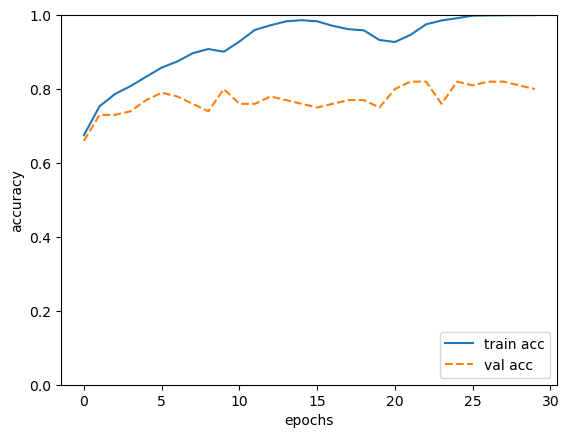

In [83]:
## 이파리 리사이즈드 이미지와 레이블 데이터를 가져와서 신경망 구현 및 학습하기
import tensorflow as tf
from tensorflow.keras.models import Sequential  # 모델을 구성하기 위한 모듈
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten  # CNN, 완전 연결계층을 구성하기 위한 모듈

tf.random.set_seed(777)

## 이파리 리사이즈드 이미지와 레이블 데이터 불러오기

# 이미지 경로 설정
train_images='/Users/dgriii0606/data/leaf/resize/train'
test_images ='/Users/dgriii0606/data/leaf/resize/test'

# 레이블 경로 설정
train_label = '/Users/dgriii0606/data/leaf/train_label.csv'
test_label ='/Users/dgriii0606/data/leaf/test_label.csv'

# 이미지와 레이블을 각 X, y에 담기
X_train = image_load(train_images)
X_test  = image_load(test_images)
y_train = label_load(train_label)
y_test = label_load(test_label)

# 이미지 데이터 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)  # (4000, 32, 32, 3)

## 모델 구성
model = Sequential()
model.add(Input(shape=(32, 32, 3)))  # 입력 레이어
model.add(Conv2D(100, kernel_size=(5, 5), padding='same', activation='relu'))  # 컨볼루션 레이어 층
model.add(MaxPooling2D(pool_size=(2, 2), padding='same') )  # 풀링 층(맥스 풀링)  # 이미지를 선명하게 해주는 층
model.add(Flatten())  # 평탄화 층  # 완전연결계층(FC)에 들어갈 수 있도록 이미지(피처맵들)를 1차원으로 변경
model.add(Dense(50, activation = 'sigmoid', input_shape = (784, )))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

## 모델 설정(경사하강법, 오차함수 정의)
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])  # 학습과정에서 정확도를 보려고 설정

## 모델 훈련
history = model.fit(X_train, y_train,
                    epochs = 30,  # 30 에포크
                    batch_size = 100,
                    validation_data=(X_test, y_test))

## 모델 평가
model.evaluate(X_test, y_test)

## 지표 그래프로 확인하기
train_acc_list = history.history['accuracy']     # train 데이터 정확도 리스트에 담기
test_acc_list = history.history['val_accuracy']  # test 데이터 정확도 리스트에 담기

import matplotlib.pyplot as plt

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='val acc', linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

(4000, 32, 32, 3)
Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.6497 - loss: 0.6664 - val_accuracy: 0.6400 - val_loss: 0.6544
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8054 - loss: 0.4162 - val_accuracy: 0.6200 - val_loss: 0.6554
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8403 - loss: 0.3600 - val_accuracy: 0.5100 - val_loss: 0.6750
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8810 - loss: 0.2872 - val_accuracy: 0.5000 - val_loss: 0.8321
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8915 - loss: 0.2460 - val_accuracy: 0.5000 - val_loss: 0.9878
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9203 - loss: 0.2093 - val_accuracy: 0.5000 - val_loss: 0.8206
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9363 - loss: 0.1611 - val_accuracy: 0.5100 - val_loss: 0.9145
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9505 - loss: 0.1362 - val_ac

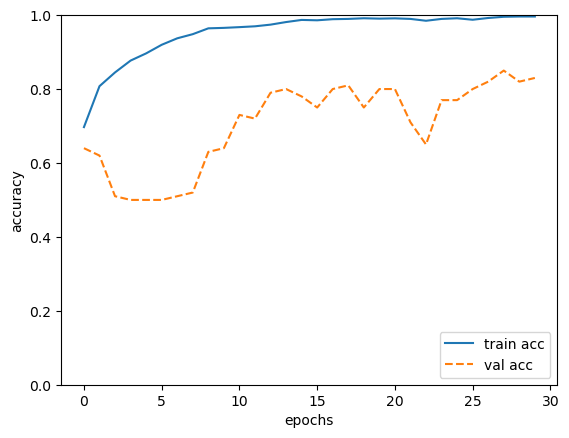

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization  # CNN, 완전연결계층, 드롭아웃, 배치 정규화를 구성하기 위한 모듈
from tensorflow.keras.callbacks import EarlyStopping  # 얼리 스탑핑을 위한 모듈
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(777)  # 랜덤 시드 고정

## 이파리 리사이즈드 이미지와 레이블 데이터 불러오기

# 이미지 경로 설정
train_images='/Users/dgriii0606/data/leaf/resize/train'
test_images ='/Users/dgriii0606/data/leaf/resize/test'

# 레이블 경로 설정
train_label = '/Users/dgriii0606/data/leaf/train_label.csv'
test_label ='/Users/dgriii0606/data/leaf/test_label.csv'

# 이미지와 레이블을 각 X, y에 담기
X_train = image_load(train_images)
X_test  = image_load(test_images)
y_train = label_load(train_label)
y_test = label_load(test_label)

# 정규화 진행
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)  # (4000, 32, 32, 3)

# 모델 구성
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(100, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())  # 배치 정규화 추가
model.add(Dropout(0.2))  # 드롭아웃 추가 (20% 비율)

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))  # 드롭아웃 추가 (20% 비율)

model.add(Dense(2, activation='softmax'))  # 출력층

# 모델 컴파일
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 얼리 스탑핑 설정 (validation accuracy가 10번 향상되지 않으면 학습 중단)
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=10,
                               restore_best_weights=True,
                               mode='max')  # 정확도 같은 최댓치가 목표일 때는 'max', 손실함수 같은 최솟치가 목표일 때는 'min'

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])  # 얼리 스탑핑 콜백 추가

# 모델 평가
model.evaluate(X_test, y_test)

# 훈련 및 검증 정확도 시각화
train_acc_list = history.history['accuracy']
test_acc_list = history.history['val_accuracy']

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='val acc', linestyle='--')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

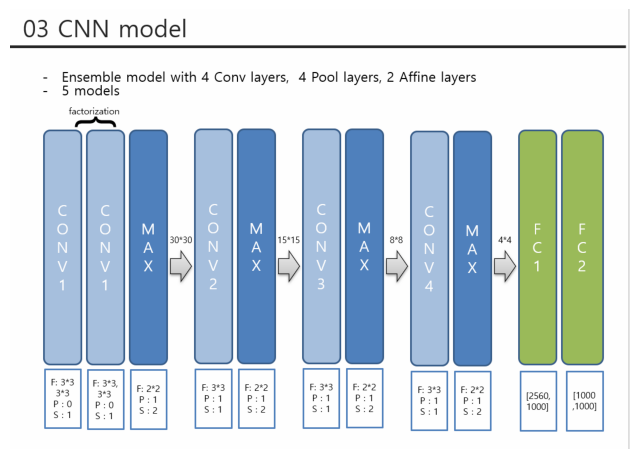

In [105]:
### 해당 설계도 이미지대로 신경망 구성해보기
from PIL import Image
arch_image = Image.open("/Users/dgriii0606/image.png")
plt.figure(figsize=(8, 8))
plt.imshow(arch_image)
plt.axis("off")
plt.show()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 2560)           │     2,624,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1000)           │     2,561,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,586,586 (21.31 MB)

 Trainable params: 5,585,626 (21.31 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.6122 - loss: 2.1074 - val_accuracy: 0.5000 - val_loss: 0.7451
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.7774 - loss: 0.4565 - val_accuracy: 0.5000 - val_loss: 1.7473
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8331 - loss: 0.3550 - val_accuracy: 0.5000 - val_loss: 2.0454
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8730 - loss: 0.2935 - val_accuracy: 0.5000 - val_loss: 2.0902
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9030 - loss: 0.2375 - val_accuracy: 0.5000 - val_loss: 4.2397
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9181 - loss: 0.2135 - val_accuracy: 0.5600 - val_loss: 2.7829
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9431 - loss: 0.1530 - val_accuracy: 0.6500 - val_loss: 1.2509
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9402 - loss: 0.1575 - val_accuracy: 0.6000 - v

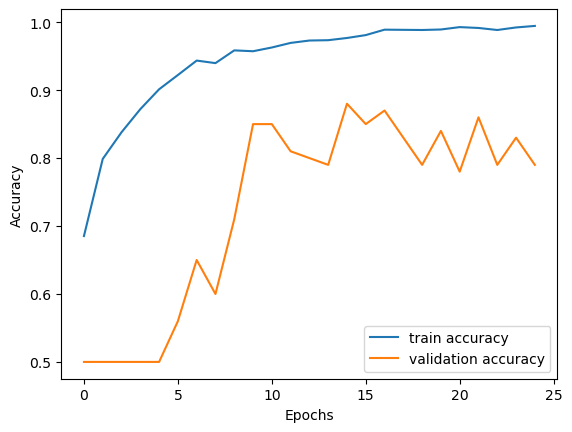

In [109]:
## 위의 분류 설계도를 기반으로 한 코드 개선
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 모델 구성 시작
model = Sequential()

# 첫 번째 컨볼루션 레이어 (CONV1) + 배치 정규화 + 두 번째 컨볼루션 레이어 (factorization)
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))  # 첫 번째 풀링 레이어

# 두 번째 컨볼루션 레이어 (CONV2) + 배치 정규화 + 풀링 레이어
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))  # 두 번째 풀링 레이어

# 세 번째 컨볼루션 레이어 (CONV3) + 배치 정규화 + 풀링 레이어
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))  # 세 번째 풀링 레이어

# 네 번째 컨볼루션 레이어 (CONV4) + 배치 정규화 + 풀링 레이어
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))  # 네 번째 풀링 레이어

# 완전 연결 계층 (Fully Connected Layers)
model.add(Flatten())  # 평탄화
model.add(Dense(2560, activation='relu'))  # 첫 번째 FC 레이어
model.add(Dropout(0.5))  # 드롭아웃 추가
model.add(Dense(1000, activation='relu'))  # 두 번째 FC 레이어

# 출력층 (2개의 클래스, softmax 활성화 함수 사용)
model.add(Dense(2, activation='softmax'))

# 모델 요약 출력
model.summary()

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 얼리 스토핑 설정 (검증 정확도가 10번 향상되지 않으면 중단)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, mode='max')

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'테스트 정확도: {test_acc}')

# 학습 결과 시각화 (정확도 그래프)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [113]:
## 모델 저장
model.save('/Users/dgriii0606/data/leaf/leaf_model.keras')

In [13]:
## 질병 이파리 분류 화면 인터페이스 만들기
# 모듈 임포트
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
import cv2  # 이미지를 전문으로 전처리하는 모듈

# 신경망 모델 로드 (질병 잎사귀 분류 모델)
model = tf.keras.models.load_model('/Users/dgriii0606/data/leaf/leaf_model.keras')

# 타겟 딕셔너리 (정상 및 질병에 해당하는 레이블)
target_dict = {
    0: 'Healthy',
    1: 'Disease',
}

# 이미지 전처리 함수
def preprocess_image(image_path):
    # 이미지 불러오기
    img = cv2.imread(image_path)

    # 이미지 크기를 32x32로 조정 (모델 입력 크기)
    resized_img = cv2.resize(img, (32, 32))

    # RGB 이미지를 그대로 사용
    img_array = np.array(resized_img) / 255.0  # 정규화
    img_array = img_array.reshape(1, 32, 32, 3)  # CNN 입력 형태로 변환 (배치 크기 포함)
    
    return img_array

# 이미지 선택 및 표시
def select_image():
    global file_path
    file_path = filedialog.askopenfilename()  # 선택한 이미지 경로 저장
    if not file_path:
        return

    # 선택한 이미지 표시
    img_display = cv2.imread(file_path)
    img_display = cv2.resize(img_display, (400, 400))  # 화면에 출력할 크기로 조정
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR, tkinter는 RGB를 사용함
    img_tk = ImageTk.PhotoImage(Image.fromarray(img_display))
    
    # 이미지 위젯 업데이트
    label_image.config(image=img_tk)
    label_image.image = img_tk

# 예측 및 결과 표시
def predict_image():
    if not file_path:
        label_prediction.config(text="No image selected")
        return

    # 이미지를 전처리하여 예측
    img = preprocess_image(file_path)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    
    # 라벨 번호에 해당하는 타겟 텍스트
    predicted_text = target_dict.get(predicted_label, "Unknown")

    # 예측된 클래스의 확률
    predicted_probability = prediction[0][predicted_label]  # 예측된 클래스의 확률
    
    # 예측 결과 업데이트
    label_prediction.config(text=f"Prediction: {predicted_text} ({predicted_probability:.4f})")

# tkinter 윈도우 설정
root = tk.Tk()
root.title("Leaf Disease Classifier")
root.geometry("500x600")  # 기본 창 크기 설정

# 이미지 선택 버튼 (위쪽에 배치)
button_select = tk.Button(root, text="Select Image", command=select_image)
button_select.pack(pady=10)  # 위쪽에 공간을 추가

# 이미지 출력할 라벨 (이미지 박스)
label_image = tk.Label(root)
label_image.pack(pady=10)

# 예측 버튼 (이미지 아래에 배치)
button_predict = tk.Button(root, text="Predict", command=predict_image)
button_predict.pack(pady=10)

# 예측 결과 출력할 라벨 (예측 버튼 아래에 배치)
label_prediction = tk.Label(root, text="", font=("Helvetica", 16))
label_prediction.pack(pady=20)

# tkinter 실행
root.mainloop()

2025-01-21 03:40:35.390 python[20727:3224731] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-21 03:40:35.390 python[20727:3224731] +[IMKInputSession subclass]: chose IMKInputSession_Modern
2025-01-21 03:41:38.260 python[20727:3224731] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


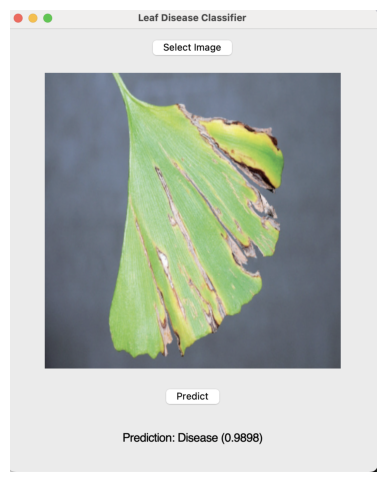

In [15]:
### 질병 이파리 분류 예시
from PIL import Image
import matplotlib.pyplot as plt
view_image1 = Image.open("/Users/dgriii0606/Desktop/leaf_result1.png")
plt.figure(figsize=(6, 6))
plt.imshow(view_image1)
plt.axis("off")
plt.show()

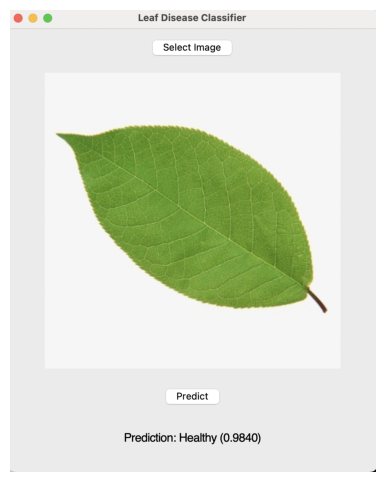

In [17]:
### 정상 이파리 분류 예시
from PIL import Image
import matplotlib.pyplot as plt
view_image2 = Image.open("/Users/dgriii0606/Desktop/leaf_result2.png")
plt.figure(figsize=(6, 6))
plt.imshow(view_image2)
plt.axis("off")
plt.show()